+ 80/20 法則
+ 技巧 dplyr & ggplot2 
+ 計算百分比與累計百分比 prop.table() &cumsum()

In [52]:
INV<-read.csv(file='MONO.csv')

In [51]:
#write.csv(INV,file='MONO.csv')

In [53]:
str(INV)

'data.frame':	1998 obs. of  9 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ORG        : Factor w/ 2 levels "X1","X2": 1 1 1 1 1 1 1 1 1 1 ...
 $ MODEL_GROUP: Factor w/ 39 levels "101608","131306",..: 17 28 32 31 28 27 1 19 28 27 ...
 $ MODEL_NAME : Factor w/ 141 levels "XC20N04.E","XC20N04.V",..: 91 107 133 126 110 119 53 9 115 119 ...
 $ YEAR       : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ MONTH      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MONO       : Factor w/ 1451 levels "M71709-025AYCW01",..: 128 178 325 327 183 189 357 361 369 22 ...
 $ QTY        : int  499727 426999 2000 52999 620000 118000 84500 134000 62000 999 ...
 $ PRODUCT    : Factor w/ 163 levels "00.C2016.16D100M",..: 94 143 158 148 144 120 62 9 137 120 ...


+ XX 公司 X1 與 X2廠生產資料
+ 生產 39 MODEL_GROUP , 141 MODEL_NAME , 163 PRODUCT , 1451 MONO
+ 投產工單概況

In [42]:
summary(INV$QTY)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     119    36000   121986   387263   405000 15733477 

+ 以 MODEL 統計
+ 載入Package
+ MODEL_GROUP 群組 
+ 拆分產品類型從新命名 , ModelName 第2碼為產品簡碼對應

In [45]:
library(ggplot2)
library(dplyr)
library()

In [64]:
#ModelName 第2碼為產品簡碼對應
INV$PRODUCT_TYPE<-substr(INV$MODEL_NAME,2,2)

In [65]:
INV.Sum<-group_by(INV,ORG,PRODUCT_TYPE)%>%
summarise(MOCount=n(),QTY=sum(QTY))

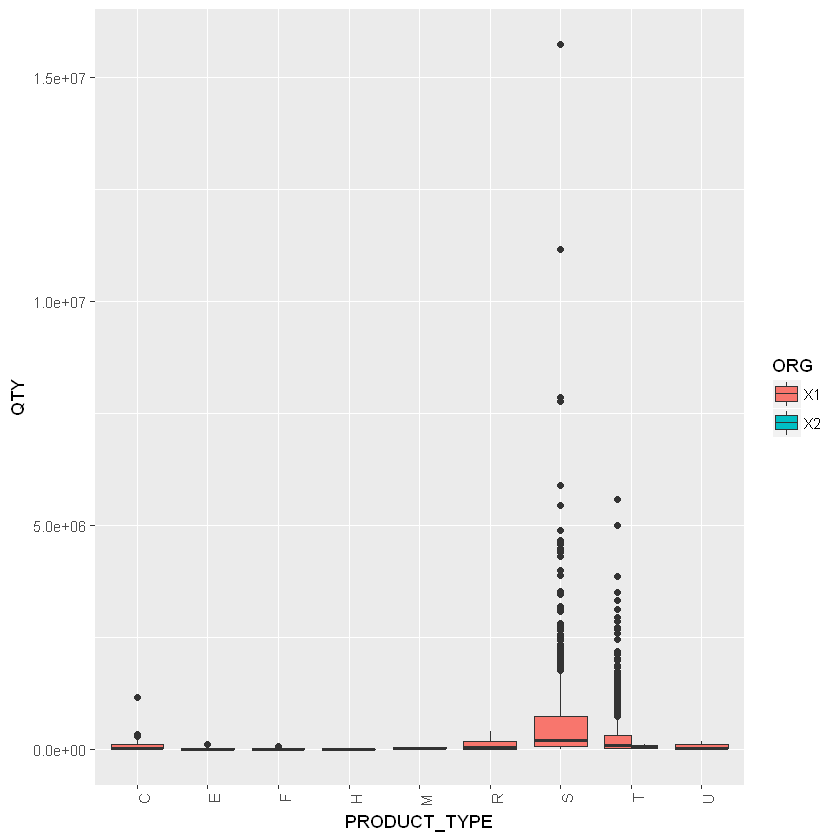

In [66]:
g<-ggplot(data=INV, aes(x=PRODUCT_TYPE,y=QTY))
g+geom_boxplot(aes(fill=ORG))+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

+ S 產品最多取 S 產品分析

In [67]:
S.Product<-filter(INV,PRODUCT_TYPE=="C")%>%
group_by(MODEL_NAME)%>%
summarise(Model.Count=n(),Qty=sum(QTY))

+ 計算百分比與累計百分比

In [70]:
S.Product$Percent<-prop.table(S.Product$Qty)
S.Product<-arrange(S.Product,desc(Percent))
S.Product$cumPercent<-cumsum(S.Product$Percent)
length(S.Product$MODEL_NAME)

[1] 12

In [71]:
S.Product<-mutate(S.Product,new.id=1:12)

In [72]:
str(S.Product)

Classes 'tbl_df', 'tbl' and 'data.frame':	12 obs. of  6 variables:
 $ MODEL_NAME : Factor w/ 141 levels "XC20N04.E","XC20N04.V",..: 6 5 3 9 1 4 10 11 12 8 ...
 $ Model.Count: int  5 2 1 2 6 2 3 2 1 1 ...
 $ Qty        : int  1890000 337000 296000 186500 161000 127000 106000 58125 47500 41500 ...
 $ Percent    : num  0.5756 0.1026 0.0901 0.0568 0.049 ...
 $ cumPercent : num  0.576 0.678 0.768 0.825 0.874 ...
 $ new.id     : int  1 2 3 4 5 6 7 8 9 10 ...


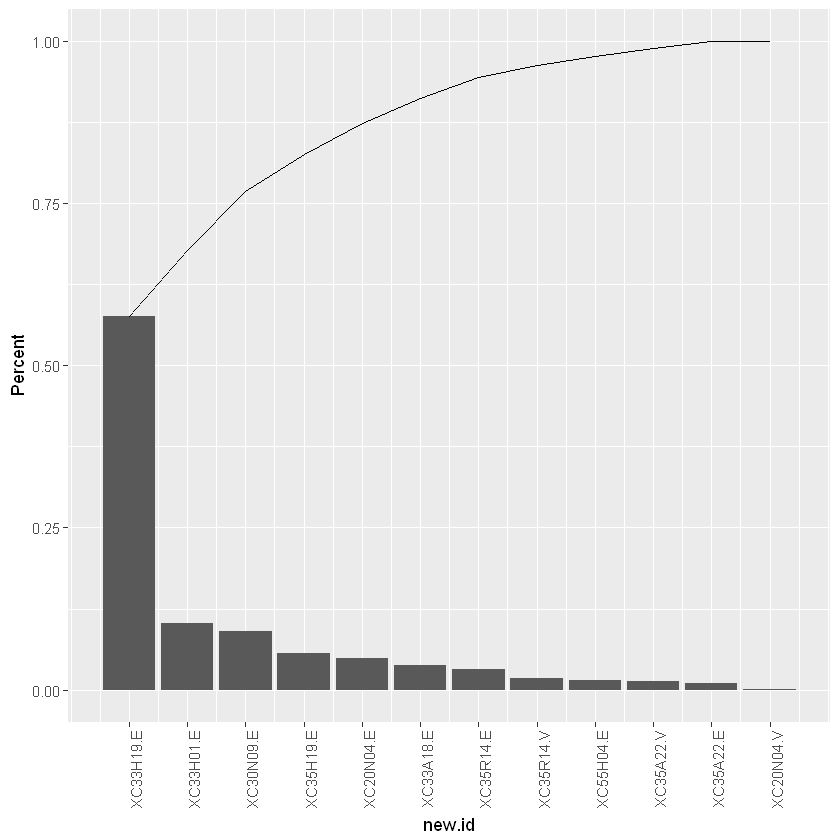

In [73]:
# 累計百分比圖
g<-ggplot(data=S.Product, aes(x=new.id,y=Percent))
g+geom_bar(aes(), stat= 'identity')+
  geom_line(aes(new.id,cumPercent))+
  scale_x_continuous(breaks = 1:12,labels = S.Product$MODEL_NAME)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
